In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Wannier function for *free* electrons 

ψ<sub>k</sub>(x) = Σ<sub>G</sub> C<sub>k,G</sub> exp[i(k + G)x]

w(x - R) = (1/√N) Σ<sub>k</sub> ψ<sub>k</sub>(x) exp[-ikR]

ψ<sub>k</sub>(x) ≈ (1/√2) [exp(ikx) ± exp(i(k - 2π/a)x)]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def construct_WF(A, a, N=200):
    q_grid = np.linspace(-15* np.pi / a, 15* np.pi / a, N)

    # Construct Hamiltonian matrix for each q
    H_matrices = []
    for q in q_grid:
        H_q = np.zeros((N, N), dtype=complex)
        for i in range(N):
            for j in range(N):
                G_i = 2 * np.pi * i / a
                if i == j:
                    H_q[i, j] = (q + G_i)**2 / 2
                elif abs(i - j) == 1:
                    H_q[i, j] = A / 2
        H_matrices.append(H_q)

    # Calculate eigenvectors for the lowest band
    eigenvectors = []
    for H_q in H_matrices:
        _, eigenvectors_q = np.linalg.eigh(H_q)
        eigenvectors.append(eigenvectors_q[:, 0])  # Lowest energy eigenvector

    # Construct Wannier function
    xs = np.linspace(0, 2, 300)
    wannier_function = np.zeros_like(xs, dtype=complex)
    for i, q in enumerate(q_grid):
        for j, x in enumerate(xs):
            psi_q_x = np.sum(eigenvectors[i] * np.exp(1j * (q + 2 * np.pi * np.arange(N) / a) * x))
            wannier_function[j] += psi_q_x * np.exp(-1j * q * a / 2)

    # Normalization
    wannier_function /= np.sqrt(N)

    return xs, wannier_function

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


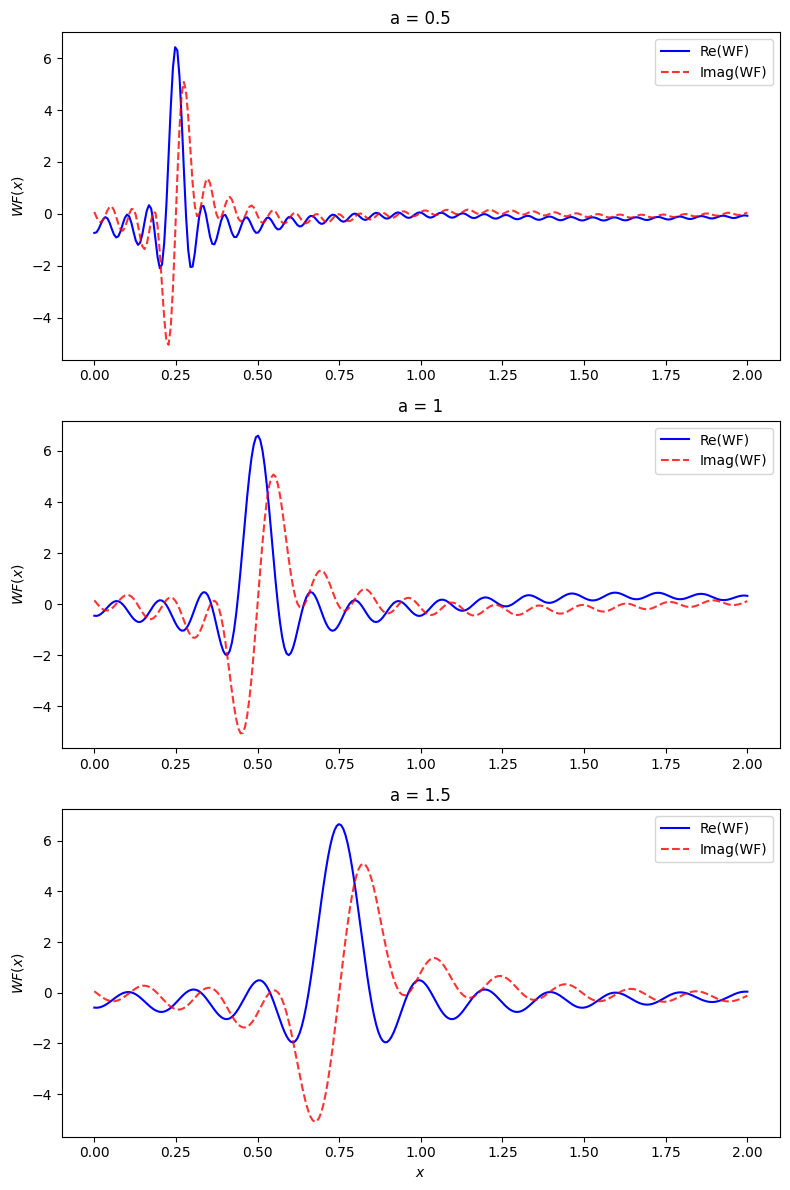

In [28]:
A = 0.2
a_range = [0.5, 1, 1.5]

plt.figure(figsize=(8, 4*len(a_range)))
plt.title(r"Wannier Function for $V(x) = A cos(2\pi x/a)$")

for i in range(len(a_range)):
    plt.subplot(len(a_range)*100 + 10 + i + 1)
    xs, WF = construct_WF(A, a_range[i])
    plt.plot(xs, np.real(WF), '-b', label=f'Re(WF)')
    plt.plot(xs, np.imag(WF), '--r', label=f'Imag(WF)', alpha=0.8)
    plt.ylabel(r"$WF(x)$")
    plt.title(r"a = {0}".format(a_range[i]))
    plt.legend()

plt.xlabel(r"$x$")
# plt.grid(True)
plt.tight_layout()
plt.savefig('docs/wannier/images/wannier.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


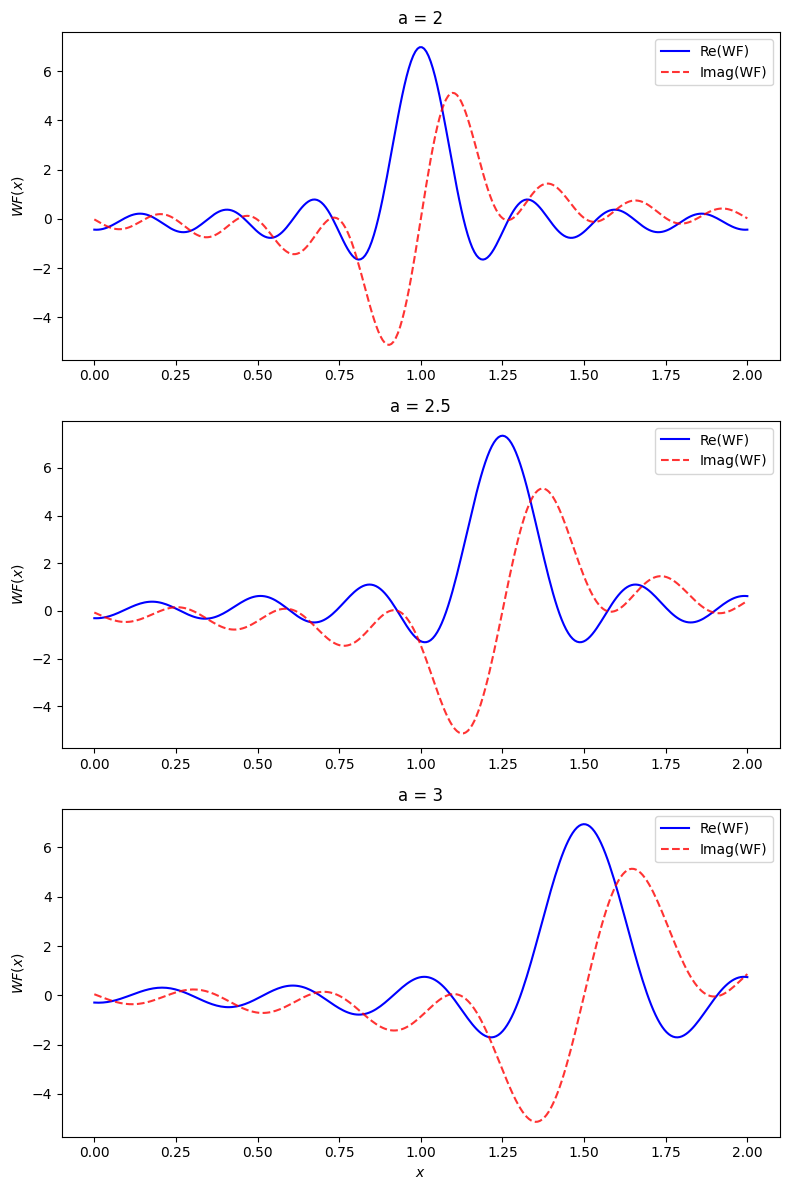

In [29]:
A = 0.2
a_range = [ 2, 2.5, 3]

plt.figure(figsize=(8, 4*len(a_range)))
plt.title(r"Wannier Function for $V(x) = A cos(2\pi x/a)$")

for i in range(len(a_range)):
    plt.subplot(len(a_range)*100 + 10 + i + 1)
    xs, WF = construct_WF(A, a_range[i])
    plt.plot(xs, np.real(WF), '-b', label=f'Re(WF)')
    plt.plot(xs, np.imag(WF), '--r', label=f'Imag(WF)', alpha=0.8)
    plt.ylabel(r"$WF(x)$")
    plt.title(r"a = {0}".format(a_range[i]))
    plt.legend()

plt.xlabel(r"$x$")
# plt.grid(True)
plt.tight_layout()
plt.savefig('docs/wannier/images/wannier1.eps')
plt.show()

other way

In [ ]:
ax = 1.0
nx = 100
nbvk = 20
nq=nbvk
dx = ax/(nx.real)
pi = 4.0*np.arctan(1.0)
dq = 2.0*np.pi/(ax*(nq.real))
rl = 5.0*ax

xs, reals, imags = [], [], []

for icell in range(1, 2*nbvk):
    for ix in range(1, nx): 
        x = -ax*0.5 + (ix-1)*dx + icell*ax
        cmp = 0+0j
        for iq in range(1, nq):
            q = -pi/ax + (iq-1)*dq
            cmp = cmp + np.exp(complex(0.0, -q*(rl-x)))
        
        xs.append(x)
        reals.append(cmp.real)
        imags.append(cmp.imag)

reals = np.array(reals)
imags = np.array(imags)

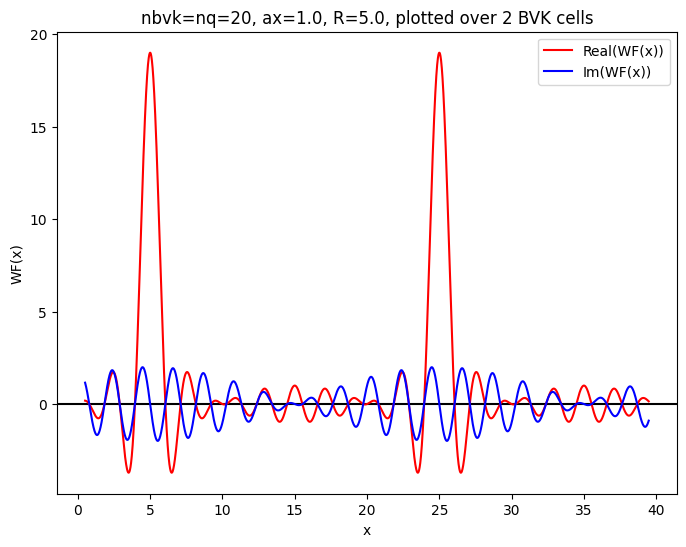

In [ ]:

plt.figure(figsize=(8,6))
plt.axhline(0, color='k')
plt.plot(xs, reals, 'r', label='Real(WF(x))')
plt.plot(xs, imags, 'b', label='Im(WF(x))')
# plt.plot(xs, np.sqrt(imags*reals), 'orange', label='Im(WF(x))')
plt.xlabel('x');plt.ylabel('WF(x)')
plt.title(f'nbvk=nq={nq}, ax={ax}, R={rl}, plotted over 2 BVK cells')
plt.legend()

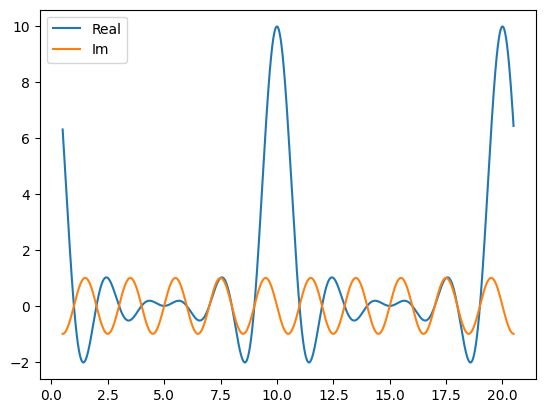

In [ ]:
x,y1,y2 = np.transpose(np.loadtxt('fort.txt', delimiter=','))
plt.plot(x, y1, label='Real')
plt.plot(x, y2, label='Im')
plt.legend()